In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
from babel.numbers import format_compact_currency

locale.setlocale(locale.LC_ALL, 'pt_BR') 
plt.style.use('grayscale')

excelsheet = "source/criptoativos_dados_abertos_02032023.xls"

with pd.ExcelFile(excelsheet) as xls:
   df1 = pd.read_excel(xls, "Relatorio1", skiprows = 7, decimal=",",header=[0,1,2])
   df2 = pd.read_excel(xls, "Relatorio2")
   df3 = pd.read_excel(xls, "Relatório3")
   df4 = pd.read_excel(xls, "Relatorio4")


/var/folders/zg/ln0dh6h10cl5khbtyvg5z5rm0000gn/T/ipykernel_3034/2366074976.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_new = df1.groupby(df1[df1.columns[0]].dt.year.rename('year')).sum()


<Axes: xlabel='year'>

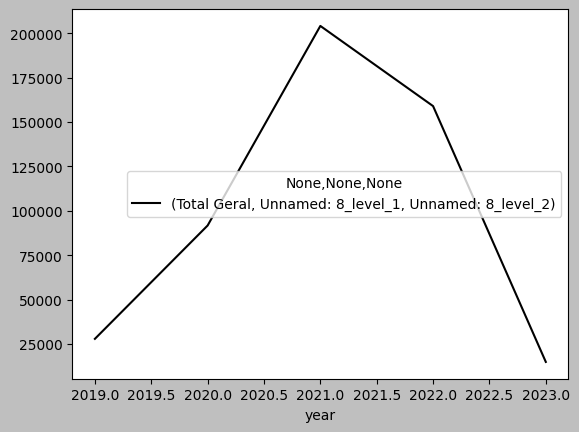

In [220]:
df1[df1.columns[0]] = pd.to_datetime(df1[df1.columns[0]], format="%B de %Y")
df1.convert_dtypes()

df1_new = df1.groupby(df1[df1.columns[0]].dt.year.rename('year')).sum()

def process_numbers(myData):
    for i in myData.columns:
        if myData[i].dtype == np.float64:
            myData[i] = myData[i].apply(lambda x: format_compact_currency(x, currency="BRL", locale="pt_BR", fraction_digits=2)) 
        else:
            continue




df1_new.plot.bar(y=[('Total Geral', 'Unnamed: 8_level_1', 'Unnamed: 8_level_2')])


# 